# Álgebra Lineal



In [ ]:
import numpy as np
from numpy import array
from math import sqrt
import matplotlib.pyplot as plt

# Biblioteca de álgebra lineal de scipy
from scipy import linalg as la

## Operaciones de matrices y vectores

Si A y B son dos matrices que se definien de la siguiente forma:

In [ ]:
A = np.array([[3, 6, 2],[-4, 6, 1],[8, -2, 3]])
A

array([[ 3,  6,  2],
       [-4,  6,  1],
       [ 8, -2,  3]])

In [ ]:
B = np.array([[4, 7, 1],[3, 4, 8],[9, 5, 6]])
B

array([[4, 7, 1],
       [3, 4, 8],
       [9, 5, 6]])

La suma se realiza con en operador +.

In [ ]:
A + B

array([[ 7, 13,  3],
       [-1, 10,  9],
       [17,  3,  9]])

En el caso de la multiplicación entre matrices **NO** se utiliza el operador ```*```. Este operador efectúa una multiplicación entre **```ndarray``` no entre matrices** ya que pertenece al tipo de operaciones que conocemos como ``` pointwise```, por lo que el usarlo tendrá como resultado $c_ij = a_{ij}*b_{ij}$.

Para multiplicar matrices se utiliza la función ```np.matmul``` o el operador especial ```@``` de la siguiente forma:

In [ ]:
print('Multiplicación entre ndarrays:\n', A * B)
print('Multiplicación entre matrices:\n', A @ B)
print('O también\n', np.matmul(A, B))

Multiplicación entre ndarrays:
 [[ 12  42   2]
 [-12  24   8]
 [ 72 -10  18]]
Multiplicación entre matrices:
 [[48 55 63]
 [11  1 50]
 [53 63 10]]
O también
 [[48 55 63]
 [11  1 50]
 [53 63 10]]


Pero además la multiplicación se pudiera expresar directamente como un producto interno usando la función ```np.dot``` de la cual hablaremos seguidamente.

Sean las siguientes matrices A y B representadas en ```ndarrays```:

In [ ]:
A = np.arange(1, 7).reshape(2, 3)
A

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
B = np.arange(1, 7).reshape(3, 2)
B

array([[1, 2],
       [3, 4],
       [5, 6]])

El producto **dot** entre dos matrices $A_{M \times P}$ y $B_{P \times N}$ se define como $(A \bullet B)_{M \times N} = \sum_{r=1}^P a_{ir} b_{rj}$. Para ello se utiliza la función ```numpy.dot```.

In [ ]:
np.dot(A, B)

array([[22, 28],
       [49, 64]])

In [ ]:
np.dot(B, A)

array([[ 9, 12, 15],
       [19, 26, 33],
       [29, 40, 51]])

En el caso del producto **dot** entre una matriz y un vector $A_{M \times N} \bullet \vec{v}_{N} = \sum_{r=1}^N a_{ir} \vec{v}_r, \, ∀ i = 1, \dots, M$ se puede implementar de la siguiente forma:

In [ ]:
v = np.arange(3)
v

array([0, 1, 2])

In [ ]:
np.dot(A, v)

array([ 8, 17])

También la función ```numpy.dot``` pudiera ser llamada desde la propia instancia del objeto ```ndarray``` de la siguiente forma:

In [ ]:
A.dot(v)

array([ 8, 17])

## Transformaciones lineales

Una transformación lineal es una función, la cual toma elementos de un espacio vectorial $V$ (Dominio) y los "transforma" a elementos del espacio vectorial $W$ (Contradominio), i.e:\
Sean V y W espacios vectoriales, tales que existe T transformacion lineal, donde $T:V → W$

### ¿Qué se necesita para que una transformación sea lineal?

Una transformación es lineal cuando cumple con los siguientes 2 puntos:
1. $T(u + v) = T(u) + T(v)$ $∀u ∈ V$  
2. $T(\alpha v) = \alpha T(v)$ $∀u ∈ V$ y $\forall \alpha \in C$

Veamos el siguiente ejemplo: \
Sea $T:  \mathbb{R}^{2} → \mathbb{R}^{3}$ donde
$T \begin{bmatrix}
x\\
y
\end{bmatrix} = \begin{bmatrix}
x + y\\
y \\
2x
\end{bmatrix}$\
¿T es una transformación lineal?\
Sean $v = \begin{bmatrix}
x_{1}\\
y_{1}
\end{bmatrix}$ y $u = \begin{bmatrix}
x_{2}\\
y_{2}
\end{bmatrix}$ tales que
$u + v =
\begin{bmatrix}
x_{1} + x_{2}\\
y_{1} + y_{2}
\end{bmatrix}$ \
$T(u + v) = T
\begin{bmatrix}
x_{1} + x_{2}\\
y_{1} + y_{2}
\end{bmatrix} = \begin{bmatrix}
(x_{1} + x_{2}) + (y_{1} + y_{2})\\
(y_{1} + y_{2})\\
2(x_{1} + x_{2})
\end{bmatrix} =$ ... $= \begin{bmatrix}
x_{1} + y_{1} + x_{2} + y_{2}\\
y_{1} + y_{2}\\
2(x_{1}) + 2(x_{2})
\end{bmatrix} = \begin{bmatrix}
x_{1} + y_{1}\\
y_{1}\\
2x_{1}
\end{bmatrix} + \begin{bmatrix}
x_{2} + y_{2}\\
y_{2}\\
2x_{2}
\end{bmatrix} = T(v) + T(u)$ \
Sea $\alpha \in \mathbb{R}$ \
$T(\alpha u) = T
\begin{bmatrix}
\alpha x\\
\alpha y
\end{bmatrix} = \begin{bmatrix}
\alpha x + \alpha y\\
\alpha y \\
2\alpha x
\end{bmatrix} = \begin{bmatrix}
\alpha (x + y)\\
\alpha (y) \\
\alpha (2x)
\end{bmatrix} = \alpha \begin{bmatrix}
x + y\\
y \\
2x
\end{bmatrix} = \alpha T(u)$ \
$\therefore T$ es lineal

## Valores y vectores propios (Eigenvalores y Eigenvectores)

Se definen como vector propio y valor propio de una matriz $A$, a aquellos valores y vectores que cumplen lo siguiente: \
Sea $A_{m\times n}$. Un escalar $\lambda$ es un valor propio de $A$ si existe un vector $\vec{v}_{1\times m}$ distinto de $\vec{0}$ tal que:   
$A\vec{v} = \lambda\vec{v}$ \
donde $\lambda$ es nombrado como un valor propio asociado al vector $\vec{v}$.


### ¿Cómo encontrar los valores y vectores propios?

Para encontrar los valores propios de una matriz de manera “fácil”  es necesario tener en cuenta al polinomio característico de una matriz.

```Definición```: El polinomio característico de una matriz $A$ de orden n es un polinomio de grado n que se define como el determinante de la matriz $A - \lambda I$, donde I es la matriz identidad de orden n y $\lambda$ es un escalar. \
$p(\lambda) = det(A - \lambda I)$


#### ¿Por qué es necesario el polinomio característico?

Sabemos que para que un valor $\lambda$ y un vector $\vec{v}$ sean propios de la matriz $A$, se tiene que cumplir $A\vec{v} = \lambda\vec{v}$, a partir de esta igualdad se puede llegar el polinomio característico de la siguiente forma: \

Supongamos que $\lambda$ es un valor propio de $A$\
$A\vec{v} = \lambda \vec{v}$\
$A\vec{v} - \lambda \vec{v} = \lambda \vec{v} - \lambda \vec{v}$\
$A\vec{v} - \lambda \vec{v} = 0$\
$(A - \lambda I) \vec{v} = 0$\
Sabemos que $\vec{v}$ no es $0$, entonces $(A - \lambda I) = 0$\
Lo cual es equivalente a $det(A - \lambda I) = 0$\
¿Por qué?\
Supongamos que $(A - \lambda I)$ es invertible, por lo que lo siguiente se cumple\
$\vec{v} = I\vec{v}$\
$\ \ = ((A - \lambda I)^{-1}(A - \lambda I))\vec{v}$\
$\ \  = (A - \lambda I)^{-1}((A - \lambda I)\vec{v})$\
$\ \  = (A - \lambda I)^{-1}0$\
$\ \  = 0$\
Como $\vec{v}$ no tiene que ser $0$, entonces $(A - \lambda I)$ no es invertible, es decir es una matriz singular, por lo que su determinante es $0$, i.e $det(A - \lambda I) = 0$, lo que quiere decir que las raíces del polinomio característico son valores propios de $A$.


###Y los vectores propios, ¿Como se encuentran?

Para determinar los vectores propios de la matriz, conociendo ya los valores propios de la misma, se tiene que satisfacer $(A−\lambda I)\vec{v} = 0$, en otras palabras $Nul((A−\lambda I))$, el cual es el espacio nulo de $(A−\lambda I)\vec{v} = 0$.

### Ejemplos


Para facilitar el proceso de calcular los valores y vectores propios, se usara la función ```eig``` de ```scipy```:

In [ ]:
# Ejemplo 1
A = np.array([[1, -1], [2, 4]])

# Calculando valores y vectores propios
e = la.eig(A)

print('Valores propios:', e[0])
print('Vectores propios normalizados:\n', e[1]/la.norm(e[1]))

Valores propios: [2.+0.j 3.+0.j]
Vectores propios normalizados:
 [[-0.5         0.31622777]
 [ 0.5        -0.63245553]]


Tenemos que para la matriz $A = \begin{bmatrix}
1 & -1\\
2 & 4
\end{bmatrix}$ \
Su polinomio característico es

$\lambda^2 - 5 \lambda + 6 = 0$

con valores propios $\lambda_1 = 3$ y $\lambda_2 = 2$.

Mientras los vectores propios son

$\vec{v}_{\lambda_1} =
\begin{bmatrix}
-\frac{1}{2} \\
\frac{1}{2}
\end{bmatrix}$ y
$\vec{v}_{\lambda_2} =
\begin{bmatrix}
\frac{1}{3} \\
-\frac{2}{3}
\end{bmatrix}$.

In [ ]:
# Ejemplo 2
A1 = np.array([[0, 1], [1, 0]])

# Calculando valores y vectores propios
e1 = la.eig(A1)

print('Valores propios:', e1[0])
print('Vectores propios normalizados:\n', e1[1]/la.norm(e1[1]))

Valores propios: [ 1.+0.j -1.+0.j]
Vectores propios normalizados:
 [[ 0.5 -0.5]
 [ 0.5  0.5]]


Tenemos que para la matriz $A1 = \begin{bmatrix}
0 & 1\\
1 & 0
\end{bmatrix}$ \
Su polinomio característico es

$\lambda^2 - 1  = 0$

con valores propios $\lambda_1 = 1$ y $\lambda_2 = -1$.

Mientras los vectores propios son

$\vec{v}_{\lambda_1} =
\begin{bmatrix}
\frac{1}{2} \\
\frac{1}{2}
\end{bmatrix}$ y
$\vec{v}_{\lambda_2} =
\begin{bmatrix}
-\frac{1}{2} \\
\frac{1}{2}
\end{bmatrix}$.

## Ortonormalidad en los vectores

Un par de vectores son ortonormales si cumplen dos condiciones: que sean ortogonales y que sean unitarios. Es decir, que su producto punto sea cero y que su norma sea uno. Por ejemplo, los vectores $(1,0)$ y $(0,1)$ son ortonormales porque:

$(1,0) \cdot (0,1) = 1 \cdot 0 + 0 \cdot 1 = 0$

$||(1,0)|| =  \sqrt{1^2 + 0^2} = 1$

$||(0,1)|| = \sqrt{0^2 + 1^2} = 1$

## Base

Una base en álgebra lineal es un conjunto de vectores que cumple dos condiciones:
1. El conjunto de vectores es linealmente independiente
2. Cualquier vector del espacio vectorial se puede escribir como una combinación lineal del conjunto de vectores que componen la base

### Base ortonormal

Un conjunto de vectores es una base ortonormal si cumplen con tres propiedades fundamentales:

1. Son ortogonales entre ellos, i.e. $\mathbf{e}_i\cdot\mathbf{e}_j=0$, $i\neq j$
2. Tienen norma 1, i.e. $||\mathbf{e}_i||=1$ $\forall i\in\left\{1,2\right\}$
3. Cualquier vector del espacio vectorial se puede escribir como una combinación lineal del conjunto de vectores que componen la base

Grafiquemos 2 vectores ortogonales, por ejemplo, los vectores que componen la base canónica para $\mathbb{R}^{2}$:
$e_{1} = (1,0)$ y $e_{2} = (0,1)$

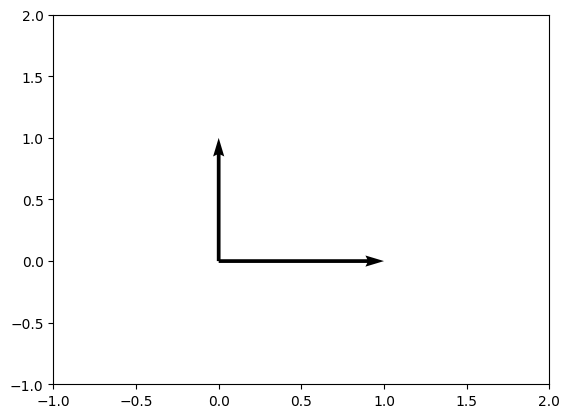

In [ ]:
x = np.array([0,0,1,0])
y = np.array([0,0,0,1])
plt.quiver([x[0], y[0]],
           [x[1], y[1]],
           [x[2], y[2]],
           [x[3], y[3]],
           angles = 'xy', scale_units = 'xy', scale=1)
plt.xlim(-1,2)
plt.ylim(-1,2)
plt.show()

Verifiquemos que son ortonormales, para esto, es necesario que cumplan con las 2 propiedades fundamentales anteriormente mencionadas:
1. Son ortogonales entre ellos, i.e. $\mathbf{e}_i\cdot\mathbf{e}_j=0$, $i\neq j$


In [ ]:
e1 = np.array([[1, 0]])
e2 = np.array([[0, 1]])
print(e1.dot(e2.T))
print(e2.dot(e1.T))

[[0]]
[[0]]


2. Tienen norma 1, i.e. $||\mathbf{e}_i||=1$ $\forall i\in\left\{1,2\right\}$

In [ ]:
print('El vector e1 tiene norma {}'.format(sqrt(e1[0][0]**2 + e1[0][1]**2)))
print('El vecotr e2 tiene norma {}'.format(sqrt(e2[0][0]**2 + e2[0][1]**2)))

El vector e1 tiene norma 1.0
El vecotr e2 tiene norma 1.0


Por ultimo, para que sea una base ortonormal, el conjunto de vectores debe de genera el espacio vectorial.

Sean $\alpha_1, \alpha_2 \in \mathbb{R}$ tal que $v = \alpha_1e_1 + \alpha_2e_2$ \
$\alpha_1(1,0) + \alpha_2(0,1) = (\alpha_1,0) + (0,\alpha_2) = (\alpha_1,\alpha_2)$\
Donde $v = (\alpha_1,\alpha_2)$ es un vector arbitrario de $\mathbb{R}^{2}$\
$\therefore$ el conjunto $\{e_1, e_2\}$ es una base ortonormal

## Ejercicios


### Ejercicio 1


In [ ]:
# Definición de una "transformación" T

def transformacion_t(v_vector: array):
  return np.array([v_vector[0][0] + 3*v_vector[1][0], v_vector[0][0] + 2*v_vector[1][0]])

v_vector = np.array([[4],[7]])
print (transformacion_t(v_vector))

[25 18]


Tomando la definición de la transformación T, realice lo siguiente:
1. ¿Qué transformación describe?, por ejemplo: \
La transformación T corresponde a $T:  \mathbb{R}^{2} → \mathbb{R}^{3}$ donde
$T \begin{bmatrix}
x\\
y
\end{bmatrix} = \begin{bmatrix}
x + y\\
y \\
2x
\end{bmatrix}$
2. Demuestre que T es una transformación lineal


### Ejercicio 2

Sea T una transformación, donde T está descrita de la siguiente forma: \
$T:  \mathbb{R}^{2} → \mathbb{R}^{3}$ donde
$T \begin{bmatrix}
x\\
y
\end{bmatrix} = \begin{bmatrix}
x\\
y \\
2x + 3y
\end{bmatrix}$ \
Realice lo siguiente:

1. La transformación T ¿Es lineal?

T(u + v) = T
$\begin{bmatrix}
x_{1} + x_{2}\
y_{1} + y_{2}
\end{bmatrix} =
\begin{bmatrix}
x_{1} + x_{2}\
y_{1} + y_{2}\
2(x_{1} + x_{2}) + 3(y_{1} + y_{2})
\end{bmatrix}$

T(u) + T(v) =
$\begin{bmatrix}
x_{1}\
y_{1}\
2x_{1} + 3y_{1}
\end{bmatrix} +
\begin{bmatrix}
x_{2}\
y_{2}\
2x_{2} + 3y_{2}
\end{bmatrix} =
\begin{bmatrix}
x_{1} + x_{2}\
y_{1} + y_{2}\
2x_{1} + 3y_{1} + 2x_{2} + 3y_{2}
\end{bmatrix}$

Ahora, comparamos T(u + v) con T(u) + T(v):

T(u + v) =
$\begin{bmatrix}
x_{1} + x_{2}\
y_{1} + y_{2}\
2(x_{1} + x_{2}) + 3(y_{1} + y_{2})
\end{bmatrix}$

T(u) + T(v) =
$\begin{bmatrix}
x_{1} + x_{2}\
y_{1} + y_{2}\
2x_{1} + 3y_{1} + 2x_{2} + 3y_{2}
\end{bmatrix}$

Comparando las dos expresiones, vemos que T(u + v) es igual a T(u) + T(v). Por lo tanto, la transformación T cumple con la propiedad de adición de vectores.

A continuación, verifiquemos la propiedad de multiplicación por escalar:

T(cu) = T
$\begin{bmatrix}
cx\
cy
\end{bmatrix} =
\begin{bmatrix}
cx\
cy\
2(cx) + 3(cy)
\end{bmatrix}$

cT(u) = c
$\begin{bmatrix}
x\
y
\end{bmatrix} =
\begin{bmatrix}
cx\
cy\
2x + 3y
\end{bmatrix}$





2. Defina una función en Python que represente la transformación T y evalue los vectores $v_1$ y $v_2$



In [7]:
import numpy as np
# Escriba su codigo aqui
def transformacion_T(vector):
    x, y = vector
    resultado = np.array([x, y, 2 * x + 3 * y])
    return resultado

# Definir los vectores v1 y v2
v1 = np.array([1, 3])
v2 = np.array([10, 1])

# Evaluar la transformación T en v1 y v2
resultado_v1 = transformacion_T(v1)
resultado_v2 = transformacion_T(v2)

print("Resultado de T(v1):", resultado_v1)
print("Resultado de T(v2):", resultado_v2)


Resultado de T(v1): [ 1  3 11]
Resultado de T(v2): [10  1 23]
